In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np

from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

from keras.optimizers import SGD
import keras

from experiments.weightInitialization import *
from experiments.FeedforwardExperiment import FeedforwardExperiment


import matplotlib.pyplot as plt
import seaborn as sbn
import os

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Experiments Batch 1: MNIST DATA SET

In [3]:
#(c10X_train, c10y_train), (c10X_test, c10y_test) = cifar10.load_data()

In [4]:
inputSize = 784
nb_classes = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, inputSize)
X_test = X_test.reshape(10000, inputSize)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class bmatrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

dataParameters = {
    'nClass': nb_classes,
    'inputSize': inputSize   
}

(60000, 'train samples')
(10000, 'test samples')


## Experiment 2: Adam optimizer

In [5]:
nModel = 4
adam = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
parameters = {
    'nModel': nModel,
    'loss': "mean_squared_error",    
    'optimizer': "adam",
    'architecture': [10, 10],
    'softmax': False
}

outputPath = os.path.join(os.getcwd(), '..', 'report', 'images')

In [6]:
weightDistributionParameters = []
for i in range(nModel):
    weightDistributionParameters.append({
            'mean': 0,
            'variance': i + 1
    })
    

In [7]:
experiment = FeedforwardExperiment("mnist_adam_no_soft_max", parameters, dataParameters, True)
experiment.setValidationData(X_test, Y_test)

In [8]:
experiment.initializeWeights(normalWeightInitializer, weightDistributionParameters)


In [9]:
runParameters= {        
    'nEpoch': 5,
    'nMetaEpoch': 10,
    'weightDiffThreshold': 0.1,
    'batch_size': 256,    
}

In [10]:
# adam = "adam"
# experiment.setParameter('optimizer', adam, "adam_default")
# experiment._compileModels()

In [11]:
experiment.run(X_train, Y_train, **runParameters)

epoch 5
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 10
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 15
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 20
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 25
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 30
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 35
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 40
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 45
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 50
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes


mnist_adam_no_soft_max_mean_squared_error_4_adam_10_10_False_Test_error


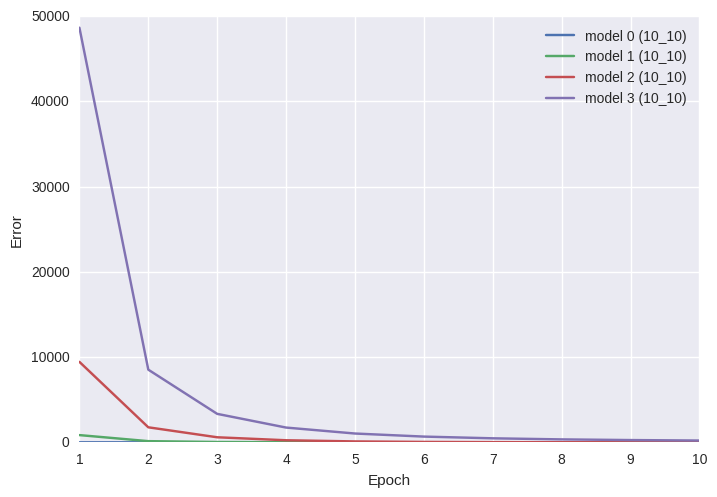

mnist_adam_no_soft_max_mean_squared_error_4_adam_10_10_False_Train_error


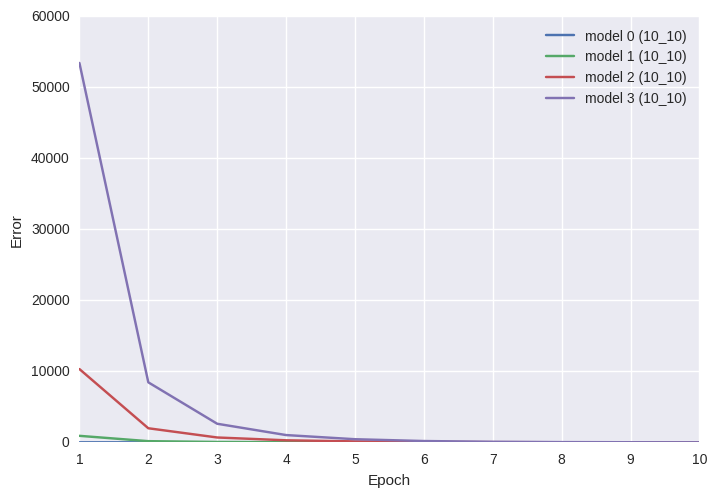

mnist_adam_no_soft_max_mean_squared_error_4_adam_10_10_False_Number_of_label_not_identically_classfied_(train)


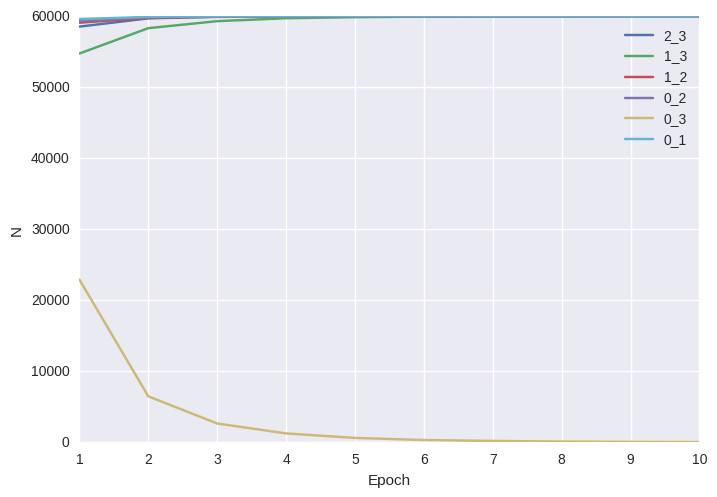

mnist_adam_no_soft_max_mean_squared_error_4_adam_10_10_False_Number_of_label_not_identically_classfied_(test)


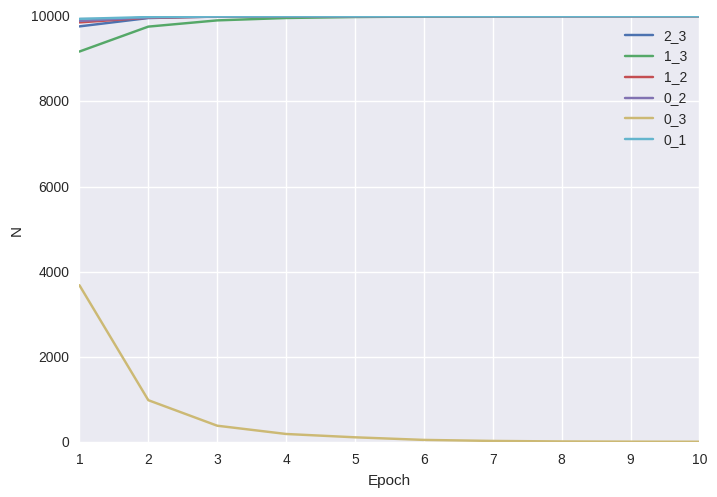

mnist_adam_no_soft_max_mean_squared_error_4_adam_10_10_False_Number_of_label_identically_classfied_(train)


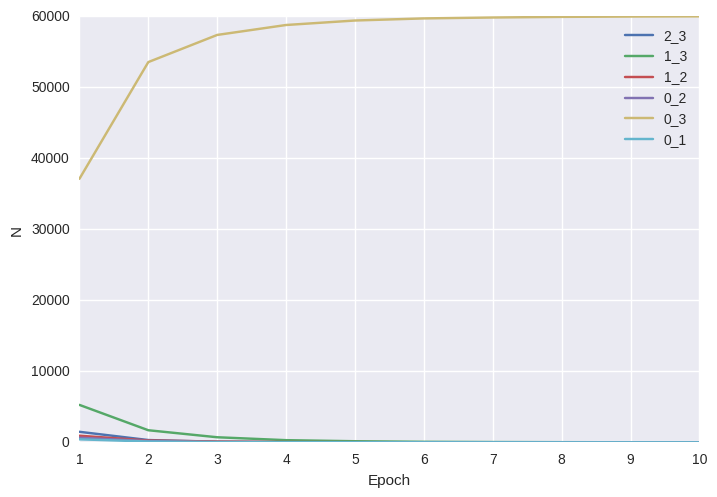

mnist_adam_no_soft_max_mean_squared_error_4_adam_10_10_False_Number_of_label_identically_classfied_(test)


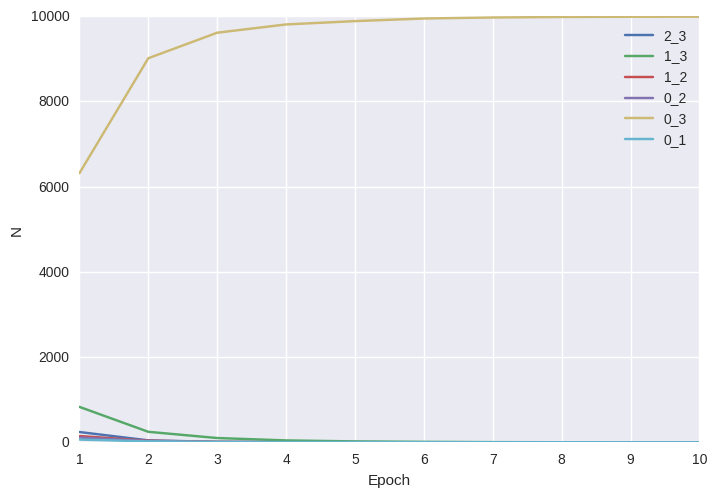

mnist_adam_no_soft_max_mean_squared_error_4_adam_10_10_False_Weight_difference_above_threshold


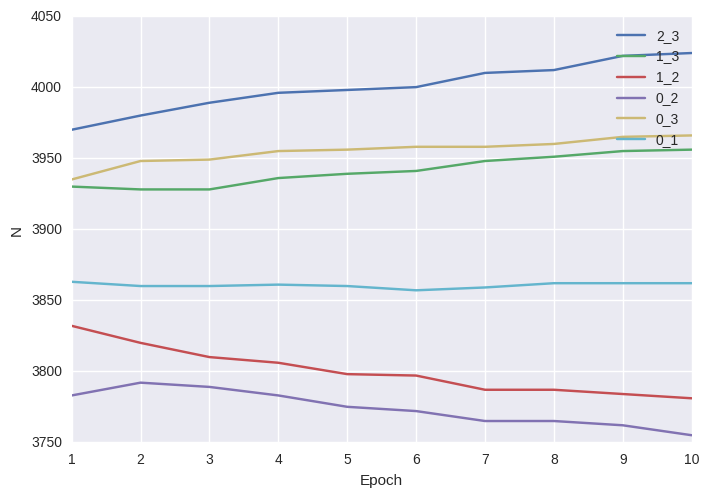

In [12]:
experiment.plotAllOutcomes(True)

In [14]:
[a.shape for a in experiment.models[0].get_weights()]

[(784, 10), (10,), (10, 10), (10,), (10, 10), (10,)]